In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import rc
from matplotlib import gridspec

rc('text', usetex=False)
rc('font', family='serif', size=34)
rc('figure', figsize=(16,12))
rc('axes',linewidth=2)

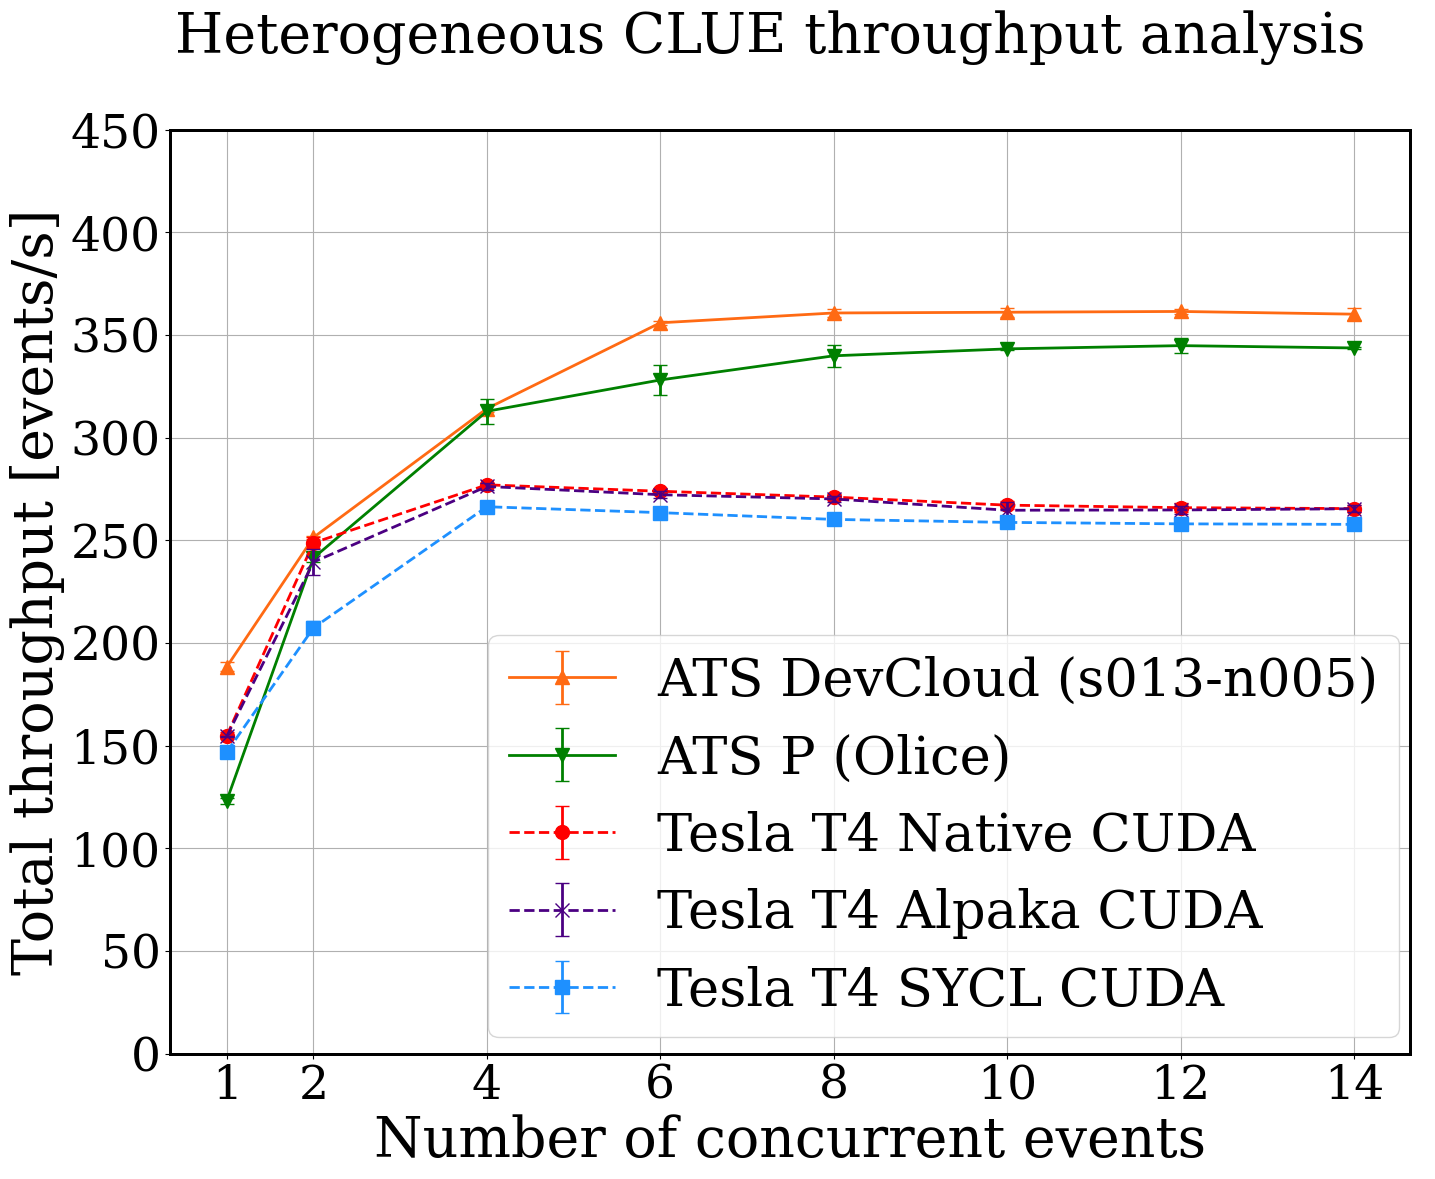

In [6]:
rc('figure', figsize=(16,12))
n_streams = (1,2,4,6,8,10,12,14)
t4_sycl_cuda = pd.read_csv("data/new_t4_sycl_cuda.csv")["mean"]
err_t4_sycl_cuda = pd.read_csv("data/new_t4_sycl_cuda.csv")["std"]

t4_cuda = pd.read_csv("data/t4_cuda.csv")["mean"]
err_t4_cuda = pd.read_csv("data/t4_cuda.csv")["std"]

t4_alpaka_cuda = pd.read_csv("data/t4_alpaka.csv")["mean"]
err_t4_alpaka_cuda = pd.read_csv("data/t4_alpaka.csv")["std"]

ats_olice = pd.read_csv("data/ats_olice.csv")["mean"]
err_ats_olice = pd.read_csv("data/ats_olice.csv")["std"]

ats_devcloud = pd.read_csv("data/devcloud_intel_gpu.csv")["mean"]
err_ats_devcloud = pd.read_csv("data/devcloud_intel_gpu.csv")["std"]

fig,ax = plt.subplots()
ax.errorbar(n_streams, ats_devcloud, err_ats_devcloud, label="ATS DevCloud (s013-n005)", linewidth=2, marker='^', markersize=10,
            color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)

ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,450)
ax.set_xticks(n_streams)
ax.grid(True)

ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_streams, ats_olice, err_ats_olice, label="ATS P (Olice)", linewidth=2, marker='v', markersize=10,
            color='green', mfc='green', mec="green", ecolor='green', capsize=5)

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_streams, t4_cuda[:8], err_t4_cuda[:8], label="Tesla T4 Native CUDA", linewidth=2, linestyle='dashed', marker='o', markersize=10,
            color='red', mfc='red', mec="red", ecolor='red', capsize=5)

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_streams, t4_alpaka_cuda[:8], err_t4_alpaka_cuda[:8], label="Tesla T4 Alpaka CUDA", linewidth=2, linestyle='dashed', marker='x', markersize=10,
            color='indigo', mfc='indigo', mec="indigo", ecolor='indigo', capsize=5) 

ax4=ax.twiny()
ax4.axes.xaxis.set_visible(False)
ax4.errorbar(n_streams, t4_sycl_cuda[:8], err_t4_sycl_cuda[:8], label="Tesla T4 SYCL CUDA", linewidth=2, linestyle='dashed', marker='s', markersize=10,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5) 


fig.suptitle("Heterogeneous CLUE throughput analysis", fontsize=40)
fig.legend(loc=(0.34,0.12), fontsize=38)

plt.show()

ValueError: 'x' and 'y' must have the same size

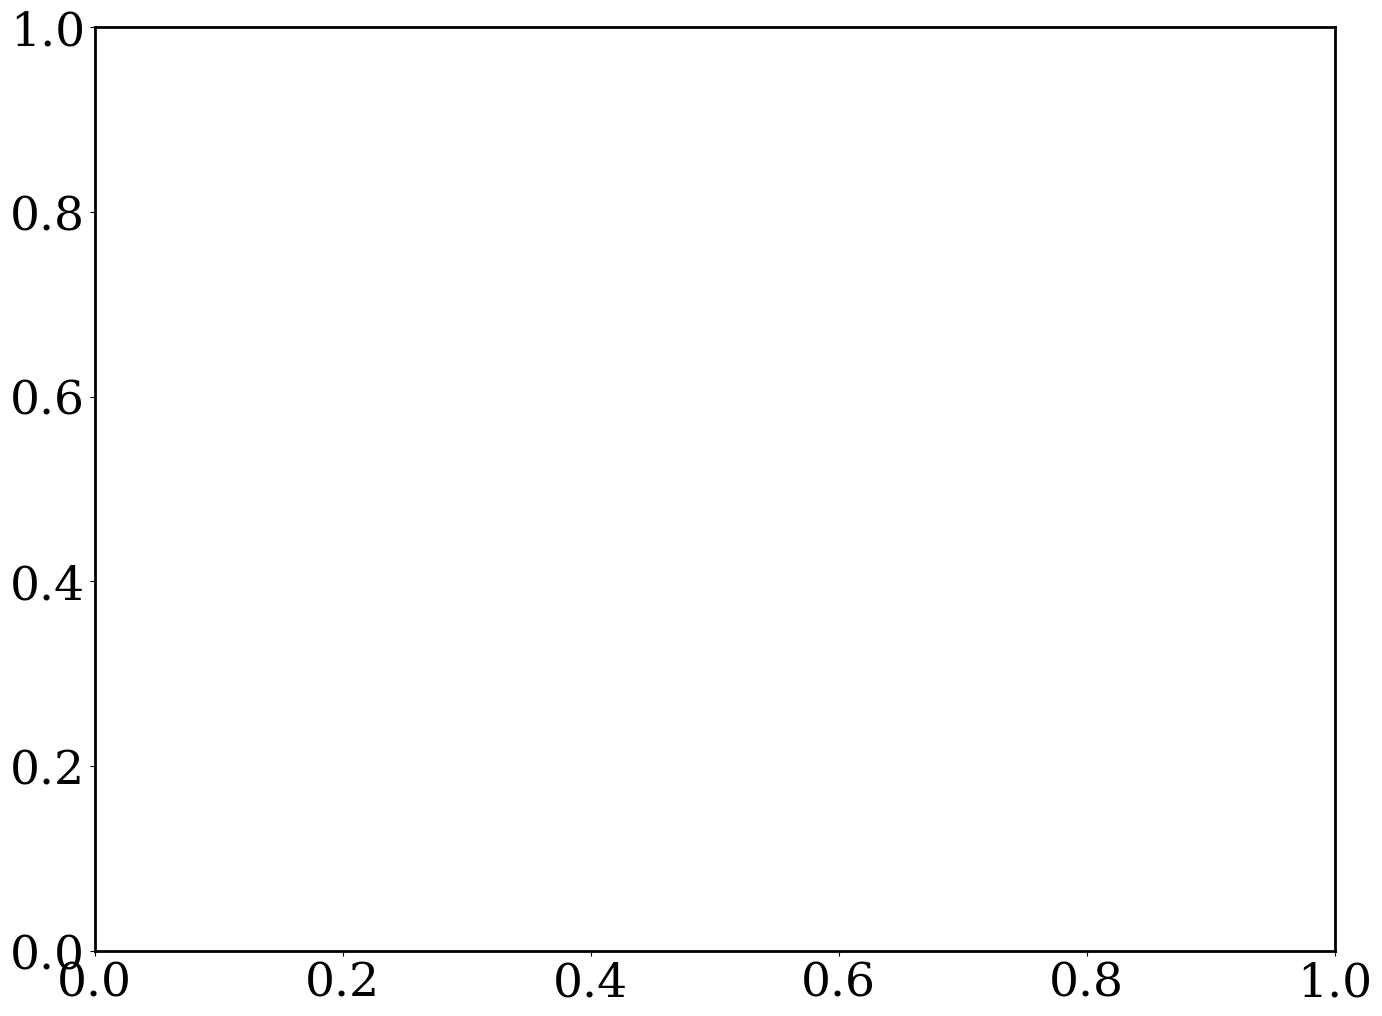

In [7]:
n_threads = (1,2,4,6,8,10,12,14,16,18)
sycl_cpu = pd.read_csv("data/sycl_cpu.csv")["mean"]
err_sycl_cpu = pd.read_csv("data/sycl_cpu.csv")["std"]

alpaka_cpu = pd.read_csv("data/alpaka_cpu.csv")["mean"]
err_alpaka_cpu = pd.read_csv("data/alpaka_cpu.csv")["std"]

serial_cpu = pd.read_csv("data/serial_cpu.csv")["mean"]
err_serial_cpu = pd.read_csv("data/serial_cpu.csv")["std"]

fig,ax = plt.subplots()
ax.errorbar(n_threads, sycl_cpu, err_sycl_cpu, label="SYCL CPU", linewidth=2,
            fmt = 'o-', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5) 
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,70)
ax.set_xticks(n_threads)

ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, alpaka_cpu, err_alpaka_cpu, label="Alpaka CPU", linewidth=2,
            fmt = 'o-', color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, serial_cpu, err_serial_cpu, label="Native serial CPU", linewidth=2,
            fmt = 'o-', color='red', mfc='red', mec="red", ecolor='red', capsize=5)


fig.suptitle("Heterogeneous CLUE throughput analysis \n on CPU Intel Xeon Silver 4114", fontsize=40)
fig.legend(loc=(0.105,0.675), fontsize=38)
plt.savefig("hCLUE_cpu_performance.png", dpi=300)
plt.show()

In [ ]:
n_threads = (1,2,4,6,8,10,12,14,16,18)
sycl_cpu = pd.read_csv("data/gold_sycl_cpu.csv")["mean"]
err_sycl_cpu = pd.read_csv("data/gold_sycl_cpu.csv")["std"]

alpaka_cpu = pd.read_csv("data/gold_alpaka_cpu.csv")["mean"]
err_alpaka_cpu = pd.read_csv("data/gold_alpaka_cpu.csv")["std"]

serial_cpu = pd.read_csv("data/gold_serial_cpu.csv")["mean"]
err_serial_cpu = pd.read_csv("data/gold_serial_cpu.csv")["std"]

fig,ax = plt.subplots()
ax.errorbar(n_threads, sycl_cpu, err_sycl_cpu, label="SYCL CPU", linewidth=2,
            fmt = 'o-', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5) 
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,90)
ax.set_xticks(n_threads)

ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, alpaka_cpu, err_alpaka_cpu, label="Alpaka CPU", linewidth=2,
            fmt = 'o-', color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, serial_cpu, err_serial_cpu, label="Native serial CPU", linewidth=2,
            fmt = 'o-', color='red', mfc='red', mec="red", ecolor='red', capsize=5)


fig.suptitle("Heterogeneous CLUE throughput analysis \n on CPU Intel Xeon Gold 6336Y", fontsize=40)
fig.legend(loc=(0.105,0.675), fontsize=38)
plt.savefig("hCLUE_cpu_performance.png", dpi=300)
plt.show()

NameError: name 'pd' is not defined

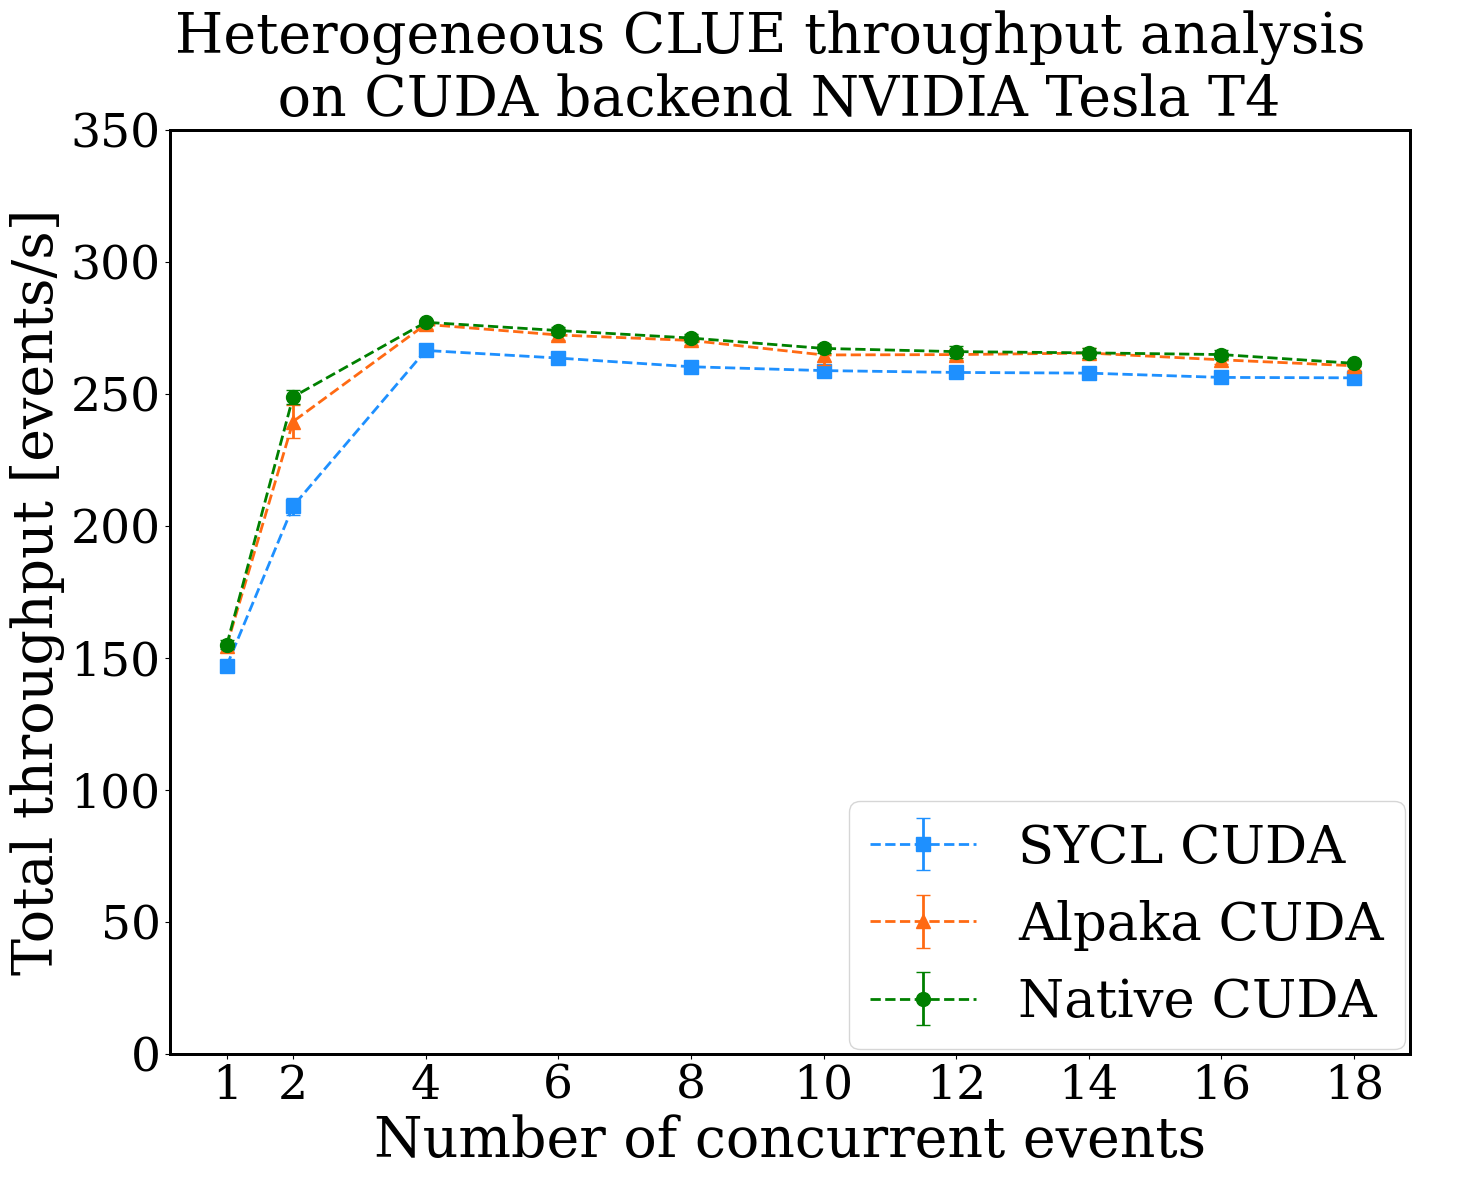

In [ ]:
n_streams = (1,2,4,6,8,10,12,14,16,18)
t4_sycl_cuda = pd.read_csv("data/new_t4_sycl_cuda.csv")["mean"]
err_t4_sycl_cuda = pd.read_csv("data/new_t4_sycl_cuda.csv")["std"]

t4_alpaka = pd.read_csv("data/t4_alpaka.csv")["mean"]
err_t4_alpaka = pd.read_csv("data/t4_alpaka.csv")["std"]

t4_cuda = pd.read_csv("data/t4_cuda.csv")["mean"]
err_t4_cuda = pd.read_csv("data/t4_cuda.csv")["std"]

fig,ax = plt.subplots()
ax.errorbar(n_streams, t4_sycl_cuda, err_t4_sycl_cuda, label="SYCL CUDA", linewidth=2, linestyle='dashed', marker='s', markersize=10,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5) 
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,350)
ax.set_xticks(n_streams)


ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_streams, t4_alpaka, err_t4_alpaka, label="Alpaka CUDA", linewidth=2, linestyle='dashed', marker='^', markersize=10,
            color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_streams, t4_cuda, err_t4_cuda, label="Native CUDA", linewidth=2, linestyle='dashed', marker='o', markersize=10,
            color='green', mfc='green', mec="green", ecolor='green', capsize=5)


fig.suptitle("Heterogeneous CLUE throughput analysis\n on CUDA backend NVIDIA Tesla T4", fontsize=40)
fig.legend(loc=(0.58,0.11), fontsize=38)
plt.savefig("hCLUE_cuda_performance.png", dpi=300)
plt.show()